In [136]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

2.18.0


In [137]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [138]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [139]:
def make_model(learning_rate=0.002):
    inputs = keras.Input(shape=(200,200,3))
    conv_layer = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
    reduce_map = keras.layers.MaxPooling2D(pool_size=(2,2))(conv_layer)
    vectors = keras.layers.Flatten()(reduce_map)
    inner_layer = keras.layers.Dense(64, activation='relu')(vectors)
    outputs = keras.layers.Dense(1, activation='sigmoid')(inner_layer)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy() #since we specify an activation for the output layer, we don't need to set from_logits=True

    model.compile(optimizer=optimizer,
                 loss=loss,
                 metrics=['accuracy'])

    return model


In [140]:
learning_rate=0.002

model = make_model(learning_rate=0.002)

In [141]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [142]:
train_generator = ImageDataGenerator(rescale=1./255)

train_ds = train_generator.flow_from_directory(
    './data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',  # Ensures labels are binary (0 or 1)
    shuffle=True
)

X, y = next(train_ds)
print(X.shape, y.shape)

print(np.unique(y)) 

Found 800 images belonging to 2 classes.
(20, 200, 200, 3) (20,)
[0. 1.]


In [143]:
train_ds.class_indices

{'curly': 0, 'straight': 1}

In [144]:
test_generator = ImageDataGenerator(rescale=1./255)

test_ds = test_generator.flow_from_directory(
    './data/test',
    target_size=(200, 200),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [145]:
test_ds.class_indices

{'curly': 0, 'straight': 1}

In [146]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.5373 - loss: 0.7154 - val_accuracy: 0.6318 - val_loss: 0.6449
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.6553 - loss: 0.6203 - val_accuracy: 0.6219 - val_loss: 0.6415
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.6885 - loss: 0.5806 - val_accuracy: 0.5970 - val_loss: 0.6941
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.6592 - loss: 0.6304 - val_accuracy: 0.6269 - val_loss: 0.6231
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.7272 - loss: 0.5446 - val_accuracy: 0.6816 - val_loss: 0.6075
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.7852 - loss: 0.4986 - val_accuracy: 0.6766 - val_loss: 0.6051
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.7830 - loss: 0.4892 - val_accuracy: 0.6368 - val_loss: 0.6346
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.7832 - loss: 0.4747 - val_accuracy: 0.626

In [164]:
hist = history.history

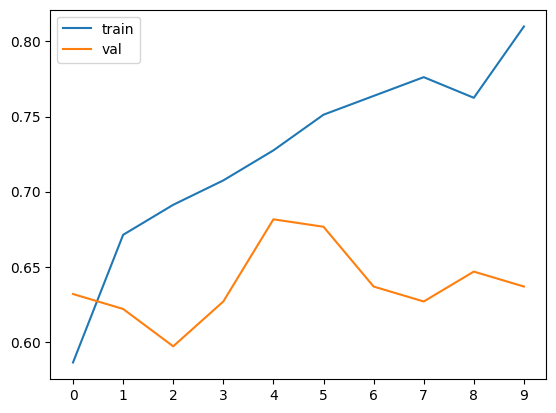

In [162]:
plt.plot(hist['accuracy'], label=('train'))
plt.plot(hist['val_accuracy'], label=('val'))

plt.xticks(np.arange(10))
plt.legend()

In [154]:
print(np.median(history.history['accuracy']))

0.7393750250339508


In [155]:
print(np.std(history.history['loss']))

0.0709215173010999
